In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os,sys

In [2]:
outfolder = os.getcwd()
outfolder += "/outputs/"
outmass = 1.0
outfolder += "/M" + str(outmass) + "/"

C:\Users\Brandon Pries\AppData\Local\Temp\ipykernel_17152\2495299106.py:79: RuntimeWarning: divide by zero encountered in log10
  ax[3][0].plot(np.log10(eps[channel])[np.array(eps[channel]) > 0], color=sub_colors[i], label=channel)


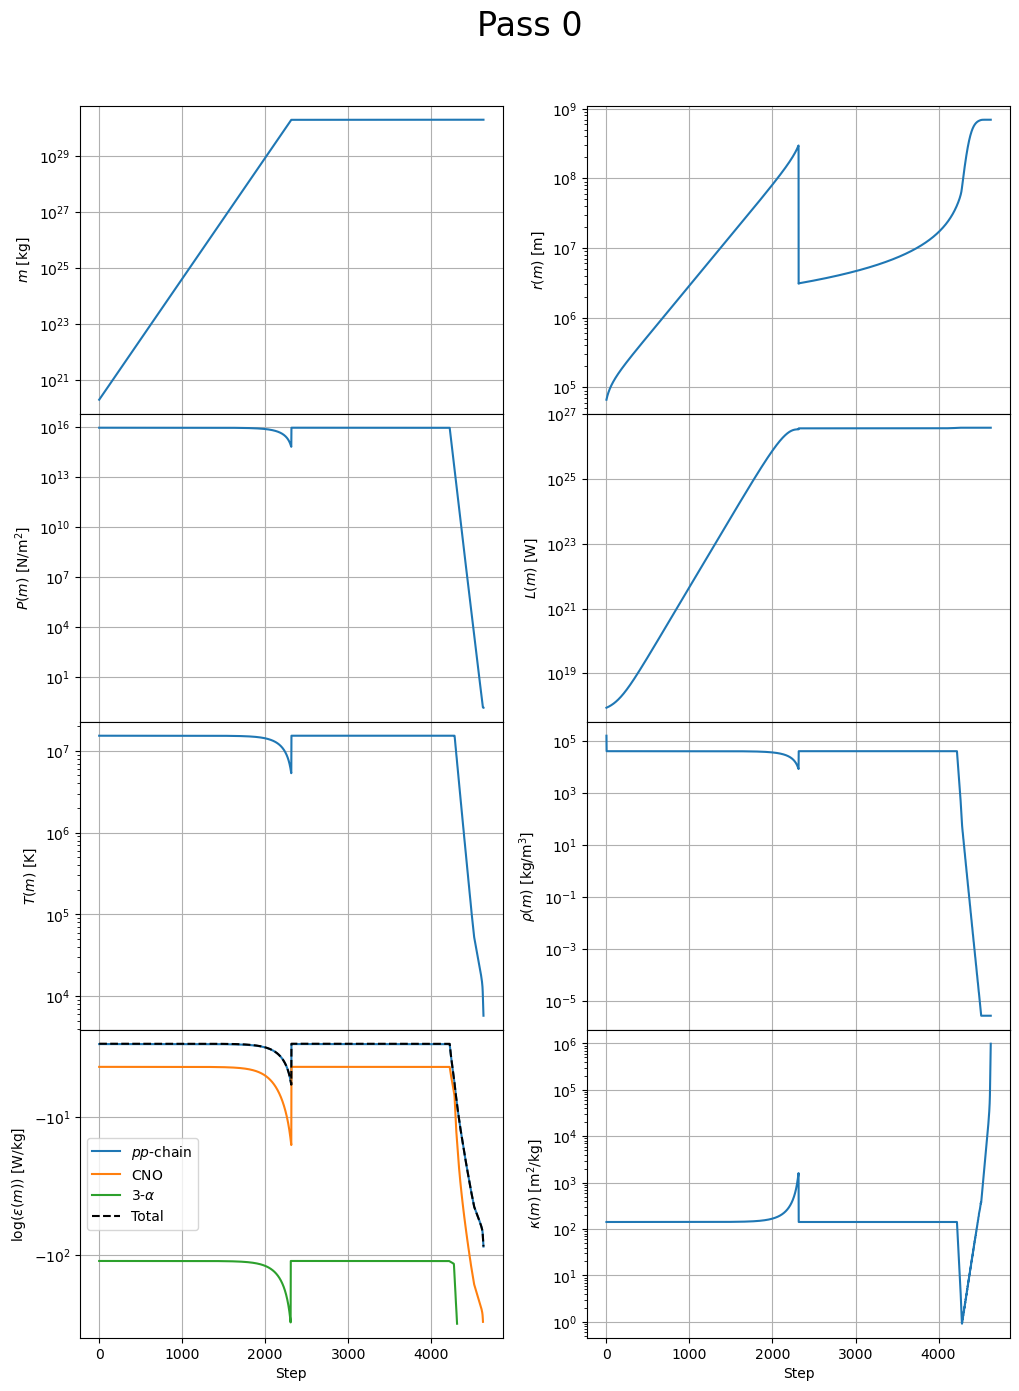

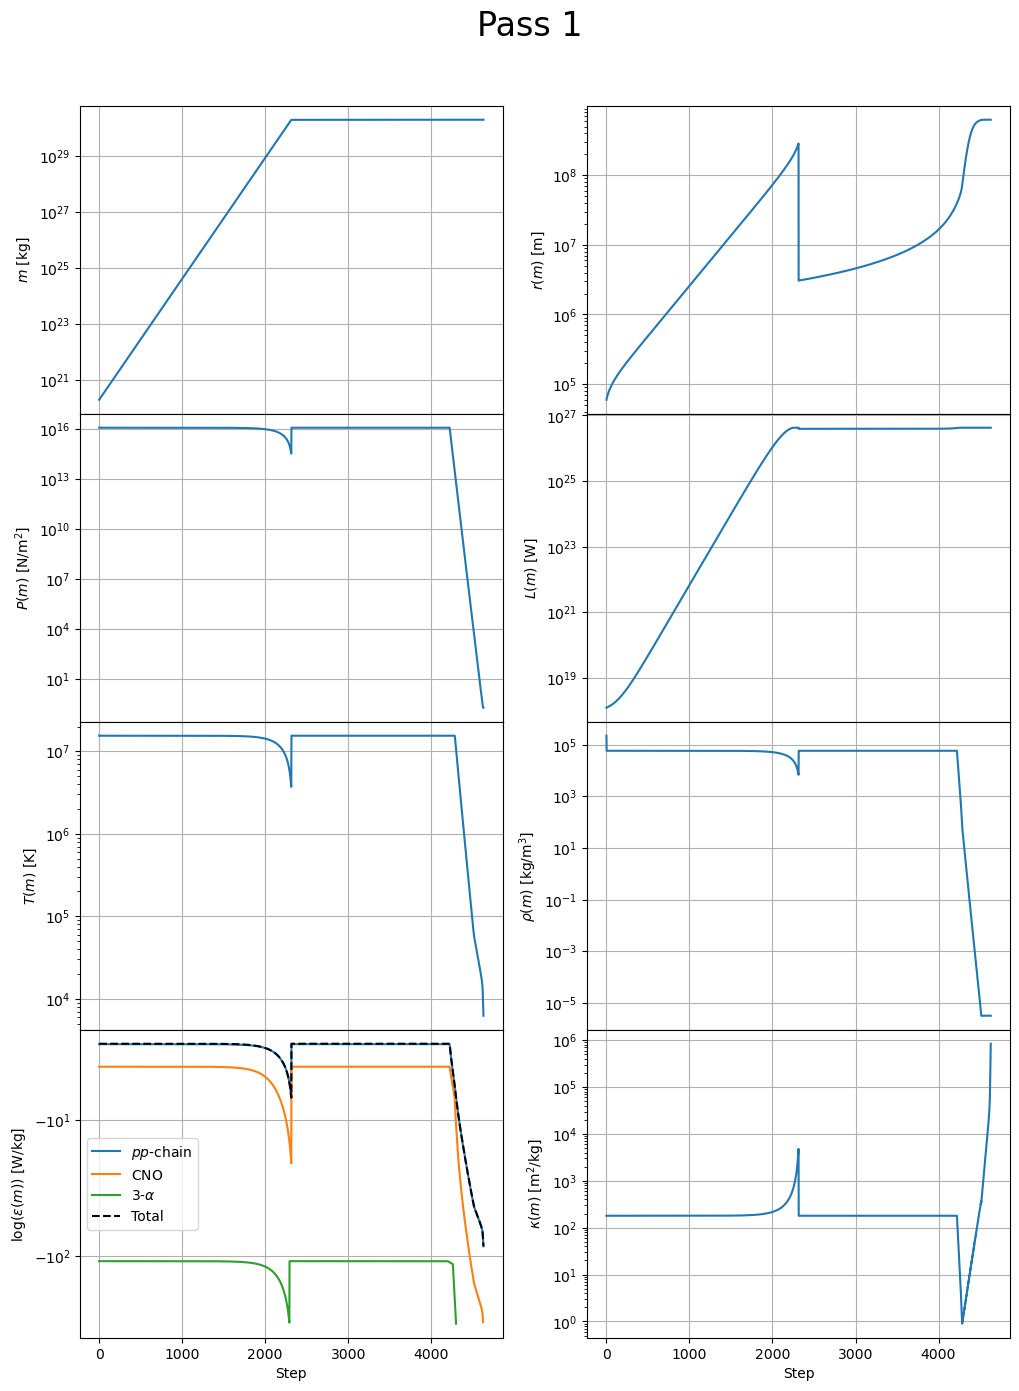

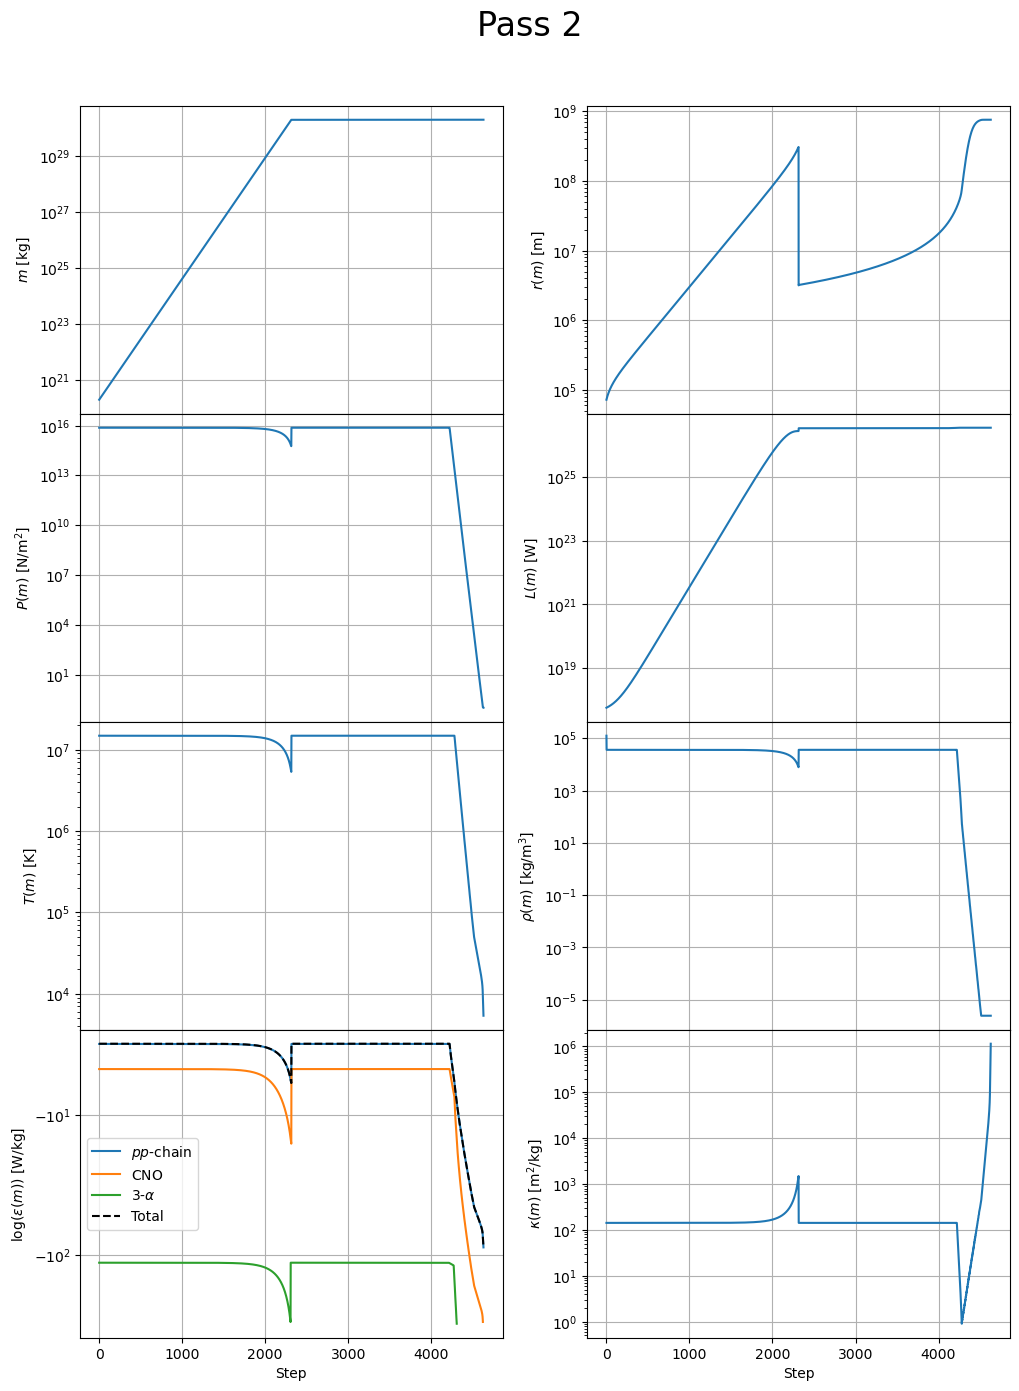

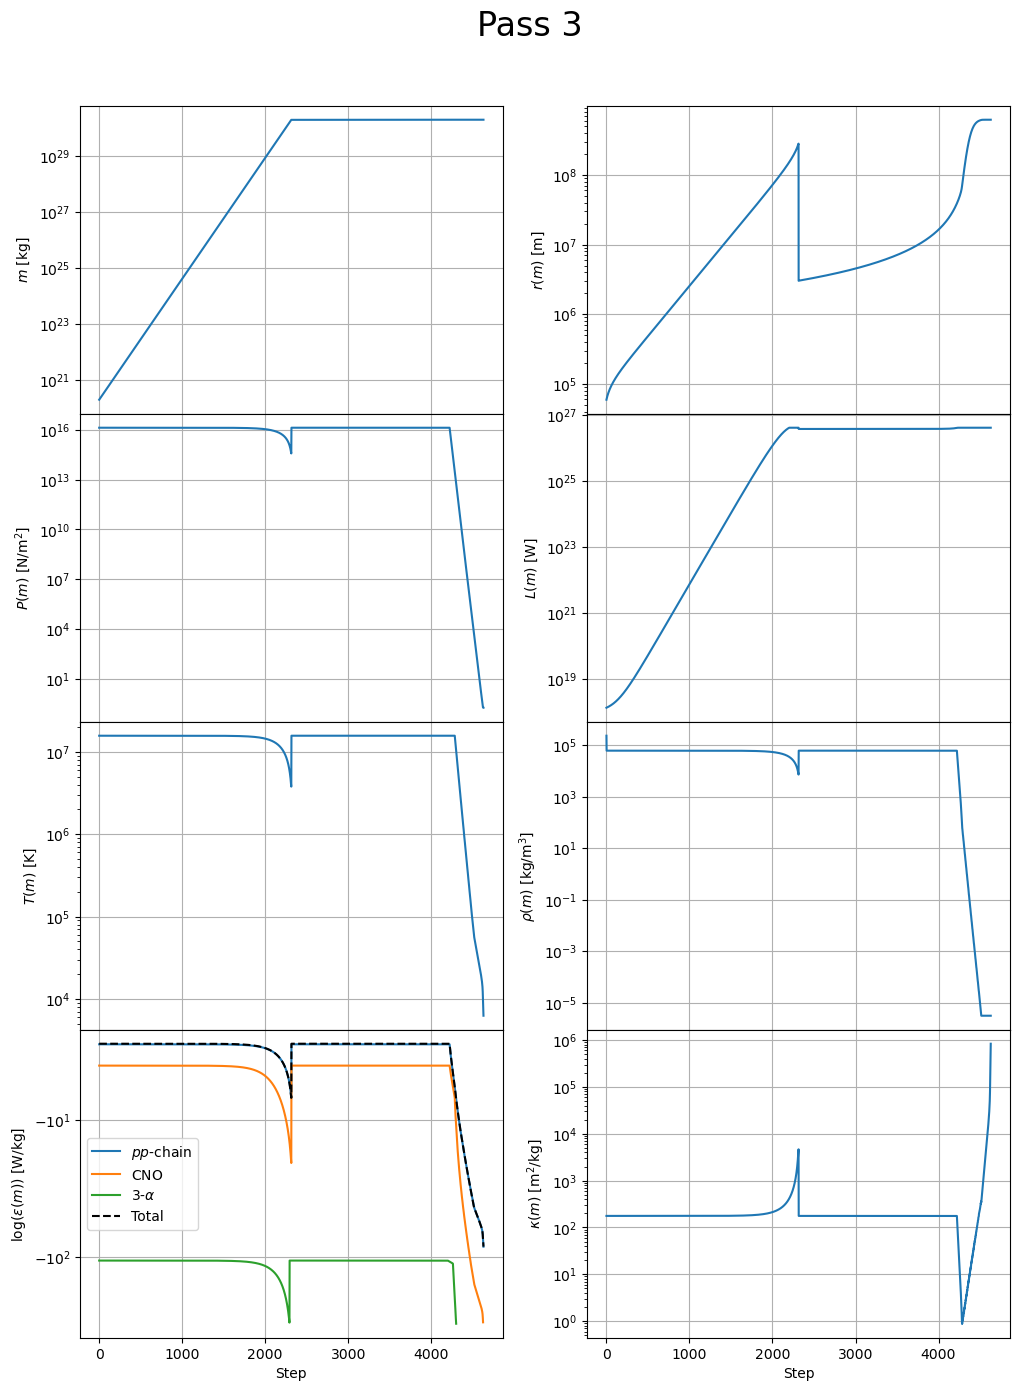

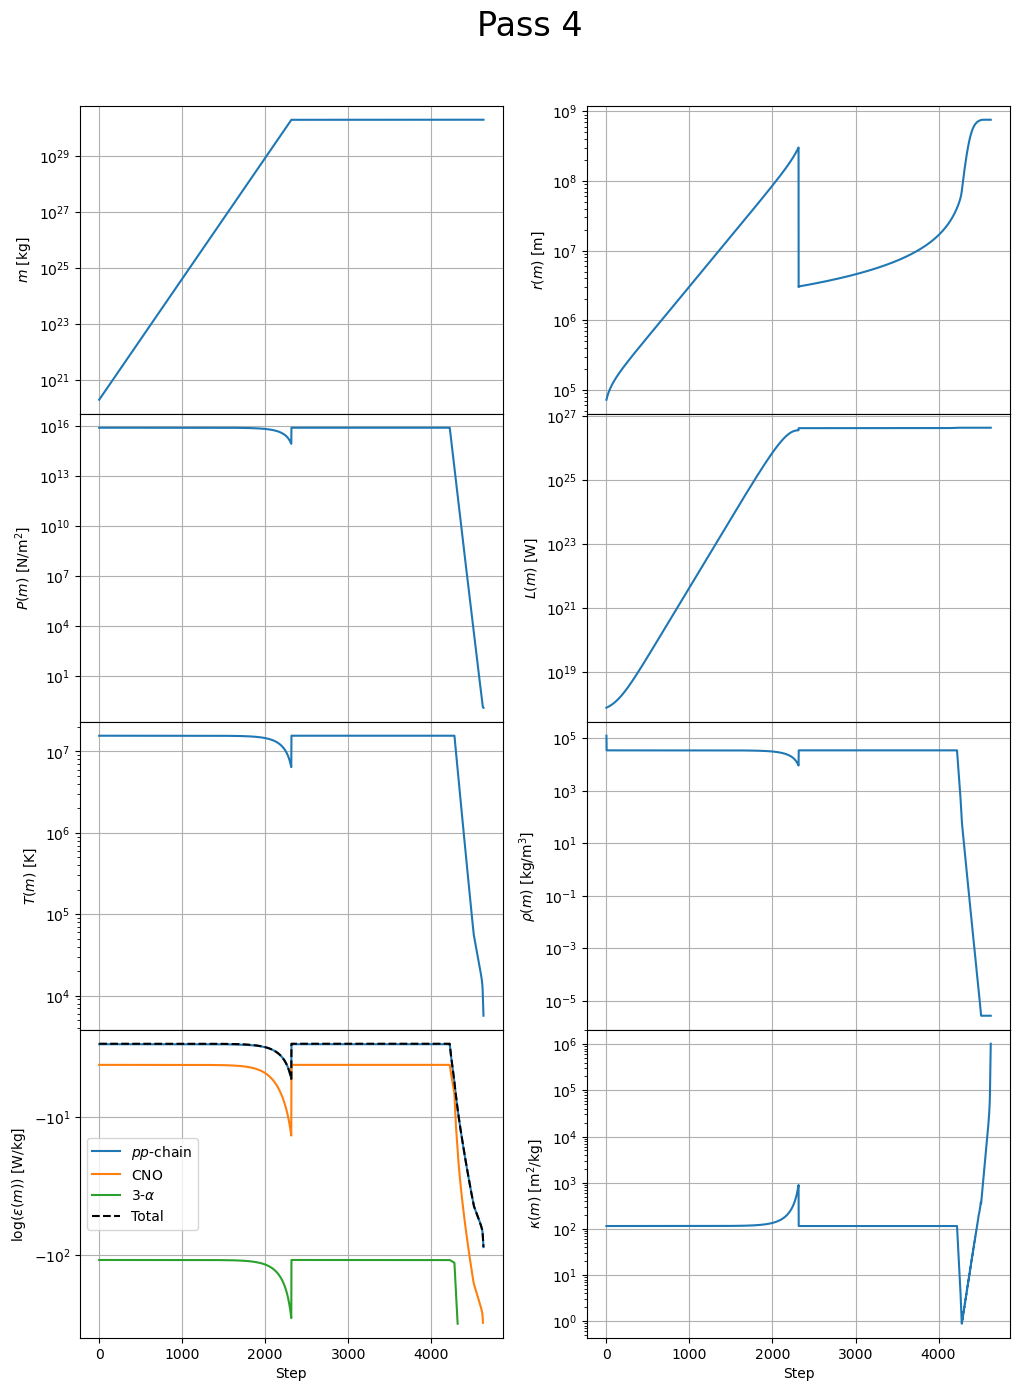

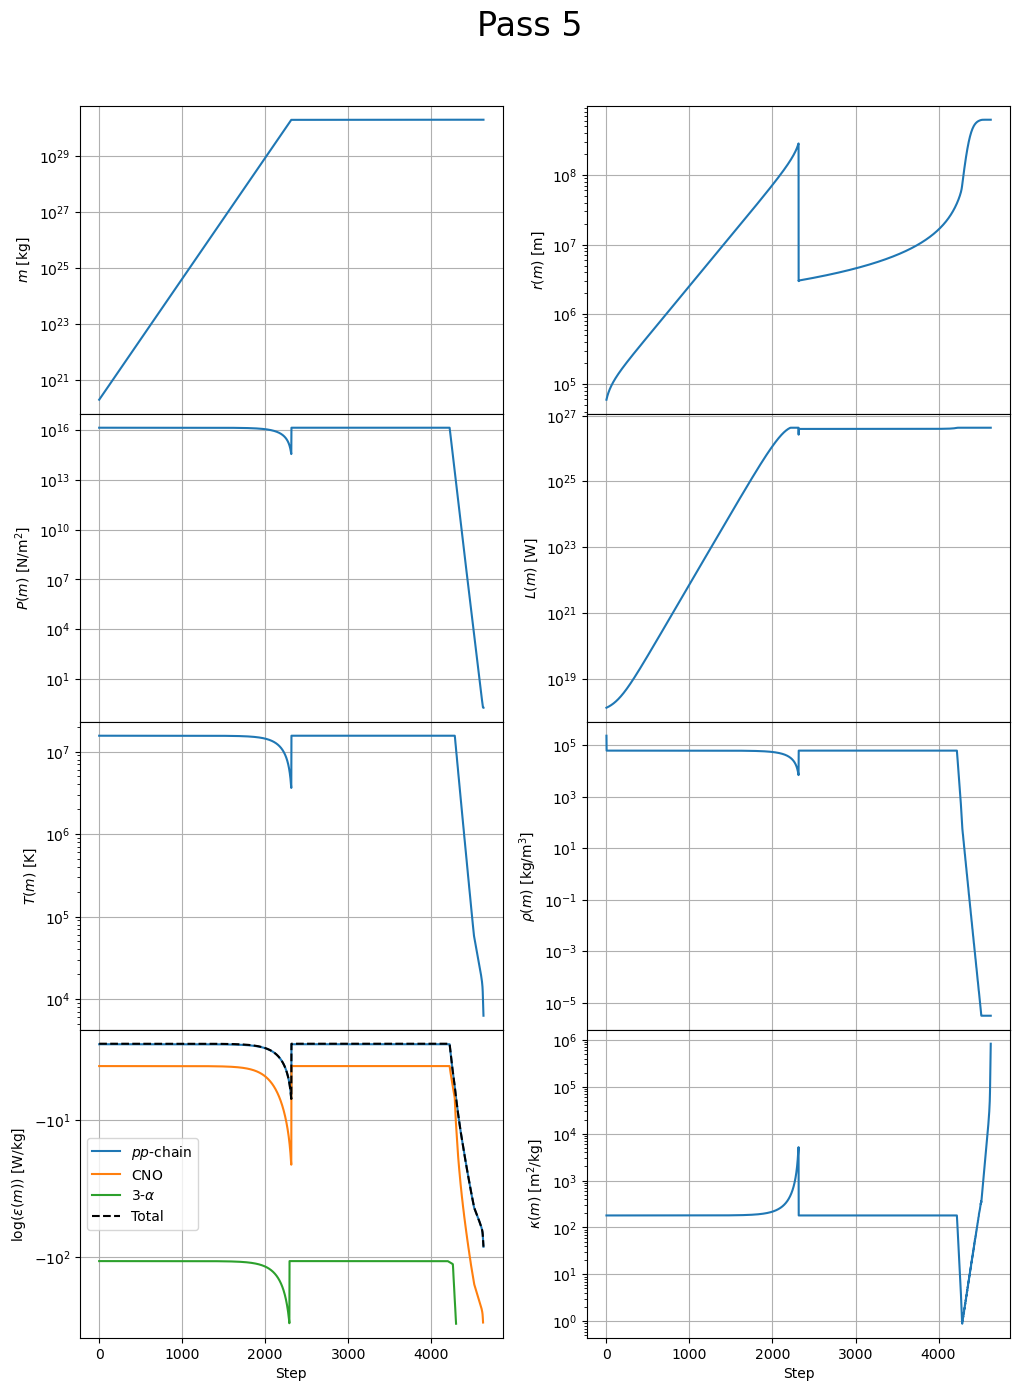

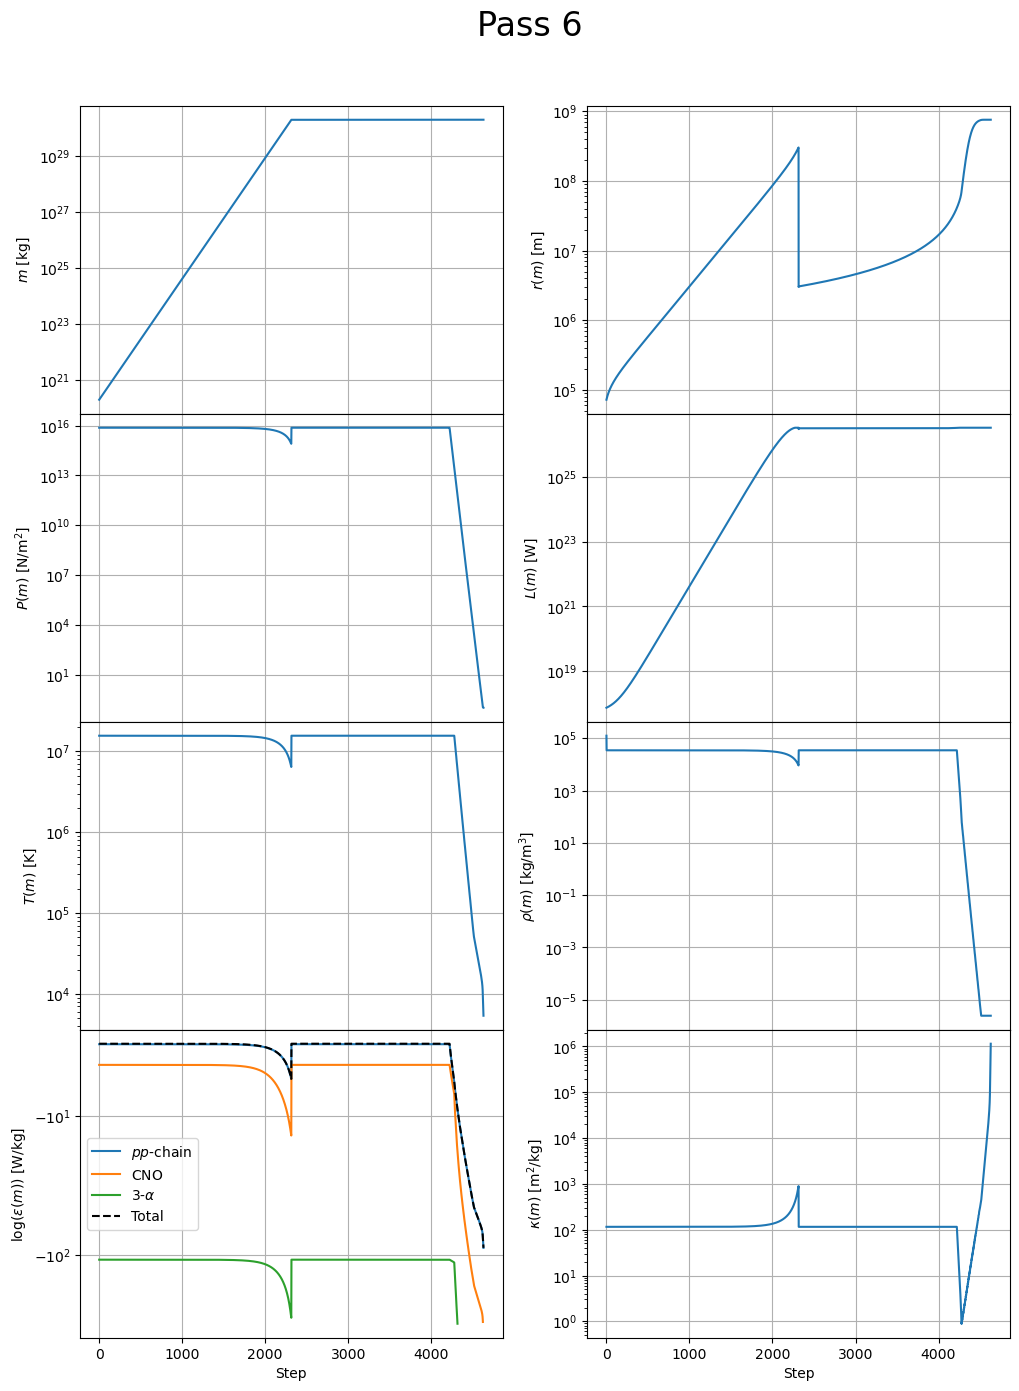

In [64]:
sub_colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", 
              "tab:olive", "tab:cyan"]

files = sorted(glob.glob(outfolder+"pass??.npy"))
for f in files:
    pass_num = int(np.round(float(f[:-4][-2:]),0))
    
    data = np.load(f,allow_pickle=True)
    m = np.array([step[0] for step in data])
    r = np.array([step[1] for step in data])
    P = np.array([step[2] for step in data])
    L = np.array([step[3] for step in data])
    T = np.array([step[4] for step in data])
    rho = np.array([step[5] for step in data])
    epsilon = np.array([step[6] for step in data])
    kappa = np.array([step[7] for step in data])
    
    # pre-processing -- list of dicts to dict of lists
    eps = dict()
    for i in range(len(epsilon)):
        for channel in epsilon[i].keys():
            if channel not in eps.keys():
                eps[channel] = []
    
    for i in range(len(epsilon)):
        for channel in epsilon[i].keys():
            eps[channel].append(epsilon[i][channel])
    
    fig, ax = plt.subplots(4,2, figsize=(12,16), sharex=True)
    fig.subplots_adjust(hspace=0)
    
    ax[0][0].plot(m)
    ax[0][0].set_yscale("log")
    #ax[0][0].set_xlabel("Step")
    ax[0][0].set_ylabel(r"$m$ $[\mathrm{kg}]$")
    ax[0][0].grid()
    
    ax[0][1].plot(r)
    #ax[0][1].set_xscale("log")
    ax[0][1].set_yscale("log")
    #ax[0][1].set_xlabel(r"$m$ $[\mathrm{kg}]$")
    #ax[0][1].set_xlabel("Step")
    ax[0][1].set_ylabel(r"$r(m)$ $[\mathrm{m}]$")
    ax[0][1].grid()
    
    ax[1][0].plot(P)
    #ax[1][0].set_xscale("log")
    ax[1][0].set_yscale("log")
    #ax[1][0].set_xlabel(r"$m$ $[\mathrm{kg}]$")
    #ax[1][0].set_xlabel("Step")
    ax[1][0].set_ylabel(r"$P(m)$ $[\mathrm{N/m^{2}}]$")
    ax[1][0].grid()
    
    ax[1][1].plot(L)
    #ax[1][1].set_xscale("log")
    ax[1][1].set_yscale("log")
    #ax[1][1].set_xlabel(r"$m$ $[\mathrm{kg}]$")
    #ax[1][1].set_xlabel("Step")
    ax[1][1].set_ylabel(r"$L(m)$ $[\mathrm{W}]$")
    ax[1][1].grid()
    
    ax[2][0].plot(T)
    #ax[2][0].set_xscale("log")
    ax[2][0].set_yscale("log")
    #ax[2][0].set_xlabel(r"$m$ $[\mathrm{kg}]$")
    #ax[2][0].set_xlabel("Step")
    ax[2][0].set_ylabel(r"$T(m)$ $[\mathrm{K}]$")
    ax[2][0].grid()
    
    ax[2][1].plot(rho)
    #ax[2][1].set_xscale("log")
    ax[2][1].set_yscale("log")
    #ax[2][1].set_xlabel(r"$m$ $[\mathrm{kg}]$")
    #ax[2][1].set_xlabel("Step")
    ax[2][1].set_ylabel(r"$\rho(m)$ $[\mathrm{kg/m^{3}}]$")
    ax[2][1].grid()
    
    for i, channel in enumerate(eps.keys()):
        ax[3][0].plot(np.log10(eps[channel])[np.array(eps[channel]) > 0], color=sub_colors[i], label=channel)
    ax[3][0].plot(np.log10(np.sum([np.copy([eps[channel] for channel in eps.keys()])], axis=1)[0]), color="black",
                  linestyle="dashed", label="Total")
    #ax[3][0].set_xscale("log")
    ax[3][0].set_yscale("symlog")
    #ax[3][0].set_xlabel(r"$m$ $[\mathrm{kg}]$")
    ax[3][0].set_xlabel("Step")
    ax[3][0].set_ylabel(r"$\log(\epsilon(m))$ $[\mathrm{W/kg}]$")
    ax[3][0].legend(loc="best")
    ax[3][0].grid()
    
    ax[3][1].plot(kappa)
    #ax[3][1].set_xscale("log")
    ax[3][1].set_yscale("log")
    #ax[3][1].set_xlabel(r"$m$ $[\mathrm{kg}]$")
    ax[3][1].set_xlabel("Step")
    ax[3][1].set_ylabel(r"$\kappa(m)$ $[\mathrm{m^{2}/kg}]$")
    ax[3][1].grid()
    
    fig.suptitle("Pass " + str(pass_num), fontsize=24, y=0.94)
    
    #plt.savefig(f[:-4] + ".png")